In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pune.csv')

In [12]:
# df.drop(columns='Unnamed: 0', inplace=True,axis=1)

In [13]:
df.shape

(123936, 20)

In [14]:
df.shape

(123936, 20)

In [15]:
df.columns.to_list()

['date',
 'temperature_2m',
 'relative_humidity_2m',
 'dew_point_2m',
 'apparent_temperature',
 'precipitation',
 'rain',
 'snowfall',
 'snow_depth',
 'pressure_msl',
 'surface_pressure',
 'cloud_cover',
 'cloud_cover_low',
 'cloud_cover_mid',
 'cloud_cover_high',
 'wind_speed_10m',
 'wind_speed_100m',
 'wind_direction_10m',
 'wind_direction_100m',
 'wind_gusts_10m']

In [16]:
df.describe()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m
count,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.0,123936.0,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000,123936.000000
mean,24.887953,64.471602,16.172284,26.242493,0.161303,0.161303,0.0,0.0,1010.357597,947.785713,36.514721,20.535954,20.759231,35.358790,9.136169,14.369771,208.620722,209.875684,22.616859
std,4.810214,24.736004,5.707758,5.031856,0.637725,0.637725,0.0,0.0,3.717096,3.364165,37.616616,31.909898,29.211196,42.124544,5.477904,8.097901,90.203563,97.074081,11.590695
min,9.364000,6.709947,-6.236000,6.401017,0.000000,0.000000,0.0,0.0,993.700000,931.901250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.045373,0.806910,1.080000
25%,22.070000,44.087170,11.719999,23.809698,0.000000,0.000000,0.0,0.0,1007.700000,945.462460,0.600000,0.000000,0.000000,0.000000,5.116561,8.161764,107.102810,100.007920,13.320000
50%,24.064001,68.645630,17.770000,26.409040,0.000000,0.000000,0.0,0.0,1010.500000,948.045500,23.400002,0.000000,6.000000,4.000000,7.928178,13.039754,245.897770,250.906400,20.519999
75%,27.570000,87.367126,21.264000,29.171914,0.000000,0.000000,0.0,0.0,1013.100000,950.205600,69.300000,31.000000,30.000000,87.000000,12.261158,19.255793,271.847560,280.885470,30.239998
max,42.913998,100.000000,25.014000,42.713356,24.500000,24.500000,0.0,0.0,1022.700000,958.929500,100.000000,100.000000,100.000000,100.000000,49.078970,77.128265,360.000000,360.000000,105.840000


In [17]:
# Identify columns with missing values and count them
print("\nMissing values count per column:")
print(df.isnull().sum())


Missing values count per column:
date                    0
temperature_2m          0
relative_humidity_2m    0
dew_point_2m            0
apparent_temperature    0
precipitation           0
rain                    0
snowfall                0
snow_depth              0
pressure_msl            0
surface_pressure        0
cloud_cover             0
cloud_cover_low         0
cloud_cover_mid         0
cloud_cover_high        0
wind_speed_10m          0
wind_speed_100m         0
wind_direction_10m      0
wind_direction_100m     0
wind_gusts_10m          0
dtype: int64


In [18]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

In [19]:
# Identify columns with all zero values or mostly zero values
zero_value_counts = (df == 0).sum()
print("Count of zero values per column:")
print(zero_value_counts)

Count of zero values per column:
date                         0
temperature_2m               0
relative_humidity_2m         0
dew_point_2m                 0
apparent_temperature         0
precipitation            96842
rain                     96842
snowfall                123936
snow_depth              123936
pressure_msl                 0
surface_pressure             0
cloud_cover              28910
cloud_cover_low          62332
cloud_cover_mid          46761
cloud_cover_high         57440
wind_speed_10m              67
wind_speed_100m             18
wind_direction_10m           0
wind_direction_100m          0
wind_gusts_10m               0
dtype: int64


In [20]:
# Identify columns to drop
# 'snowfall' and 'snow_depth' have all zero values.
# 'rain' and 'precipitation' have a very high number of zeros, but since rain is a relevant weather parameter, I will keep 'rain' and drop 'precipitation' as they are highly correlated.
# 'cloud_cover_low', 'cloud_cover_mid', and 'cloud_cover_high' are components of 'cloud_cover', so I will keep 'cloud_cover' as a summary and drop the others.
columns_to_drop = [
    'precipitation', 'snowfall', 'snow_depth',
    'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high'
]

# Drop the unnecessary columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the remaining columns
print("\nRemaining columns after dropping unnecessary ones:")
print(df_cleaned.columns)



Remaining columns after dropping unnecessary ones:
Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'rain', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m'],
      dtype='object')


In [21]:
df_cleaned.shape

(123936, 14)

In [22]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.drop(columns='date').corr()

In [23]:
# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m              1.000000             -0.631672     -0.142818   
relative_humidity_2m       -0.631672              1.000000      0.820429   
dew_point_2m               -0.142818              0.820429      1.000000   
apparent_temperature        0.921118             -0.312679      0.213669   
rain                       -0.035483              0.225268      0.241122   
pressure_msl               -0.258589             -0.316098     -0.527147   
surface_pressure            0.018926             -0.506893     -0.583984   
cloud_cover                -0.106911              0.627805      0.674562   
wind_speed_10m              0.267422              0.046552      0.249045   
wind_speed_100m             0.107442              0.169683      0.291781   
wind_direction_10m          0.213103              0.079242      0.224815   
wind_direction_100m         0.192936              0.087688      0.2

In [24]:
# Save the correlation matrix to a CSV file for the user
correlation_matrix.to_csv('correlation_matrix.csv')

In [25]:
# --- Outlier detection (IQR method) ---
def find_outliers_iqr(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
    return outliers

In [26]:
# Columns to check for outliers
numerical_columns = df_cleaned.drop(columns=['date']).select_dtypes(include=['float64', 'int64']).columns
outliers_dict = {col: find_outliers_iqr(df_cleaned, col) for col in numerical_columns}

In [27]:
# Print the number of outliers for each column
print("\nNumber of outliers detected using IQR method:")
for col, outliers in outliers_dict.items():
    print(f"Column '{col}': {len(outliers)} outliers")


Number of outliers detected using IQR method:
Column 'temperature_2m': 4273 outliers
Column 'relative_humidity_2m': 0 outliers
Column 'dew_point_2m': 129 outliers
Column 'apparent_temperature': 5827 outliers
Column 'rain': 27094 outliers
Column 'pressure_msl': 208 outliers
Column 'surface_pressure': 444 outliers
Column 'cloud_cover': 0 outliers
Column 'wind_speed_10m': 2646 outliers
Column 'wind_speed_100m': 1891 outliers
Column 'wind_direction_10m': 0 outliers
Column 'wind_direction_100m': 0 outliers
Column 'wind_gusts_10m': 893 outliers


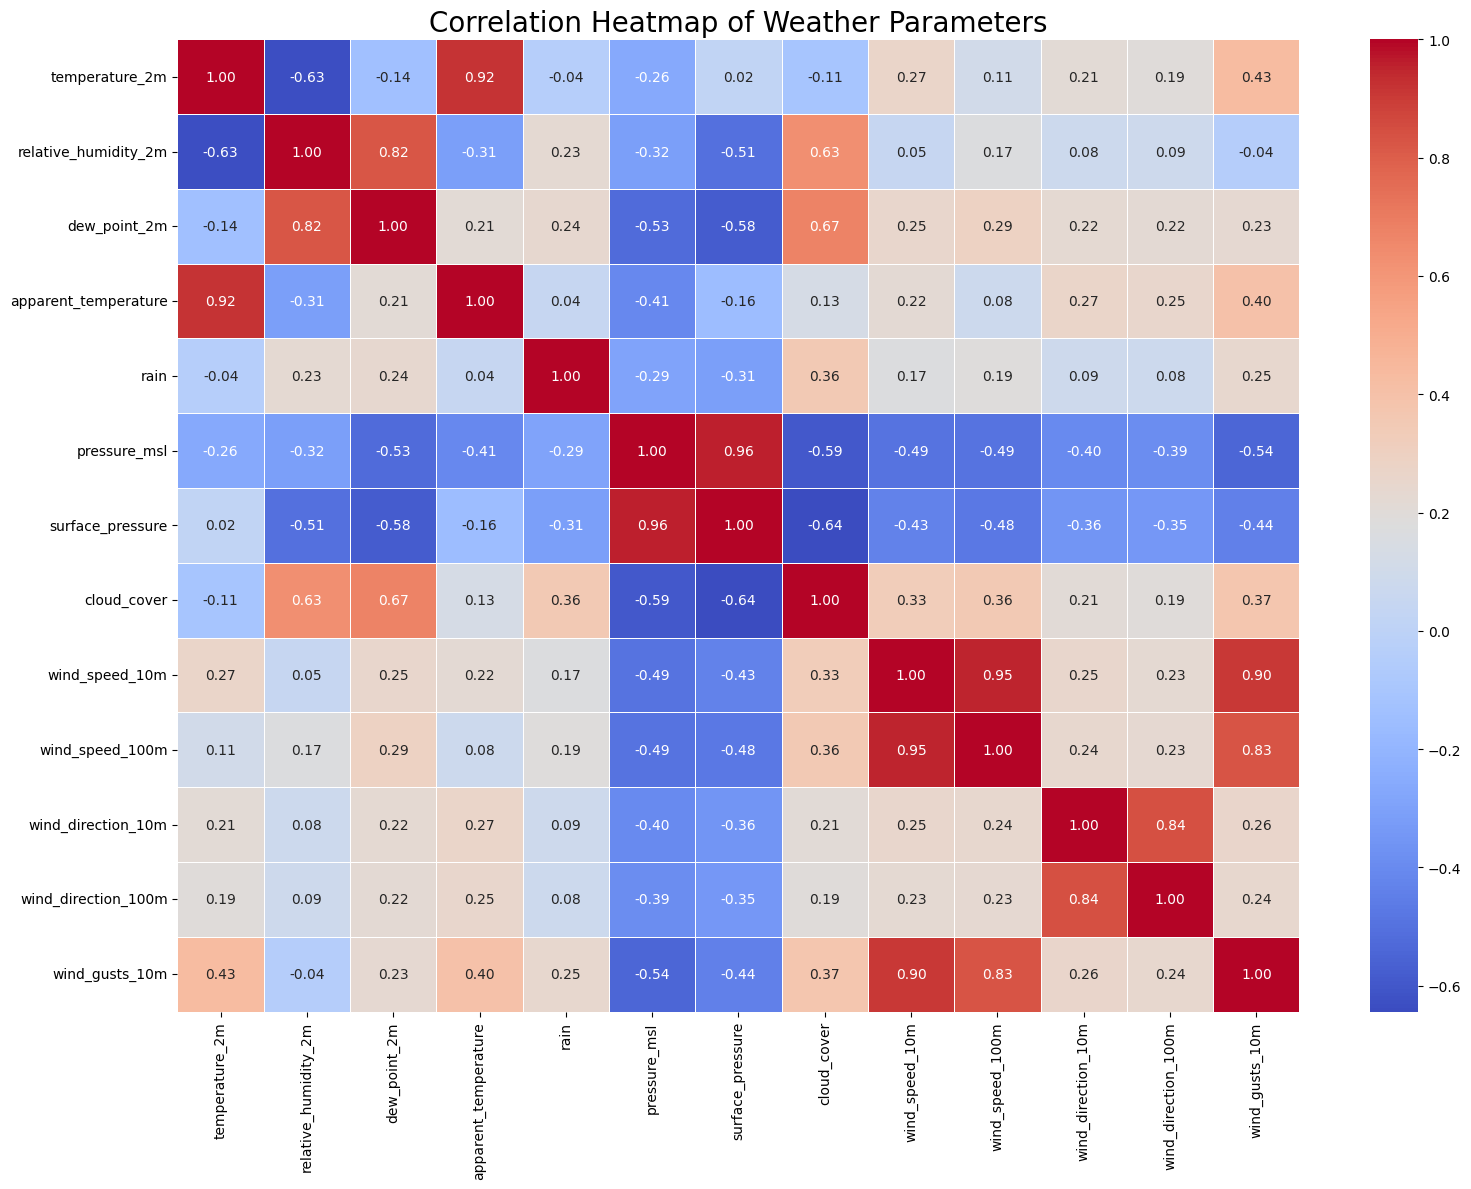

In [28]:
# --- Plotting ---
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size for better readability
plt.figure(figsize=(16, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Weather Parameters', fontsize=20)
plt.tight_layout()
#plt.savefig('correlation_heatmap.png')
plt.show()

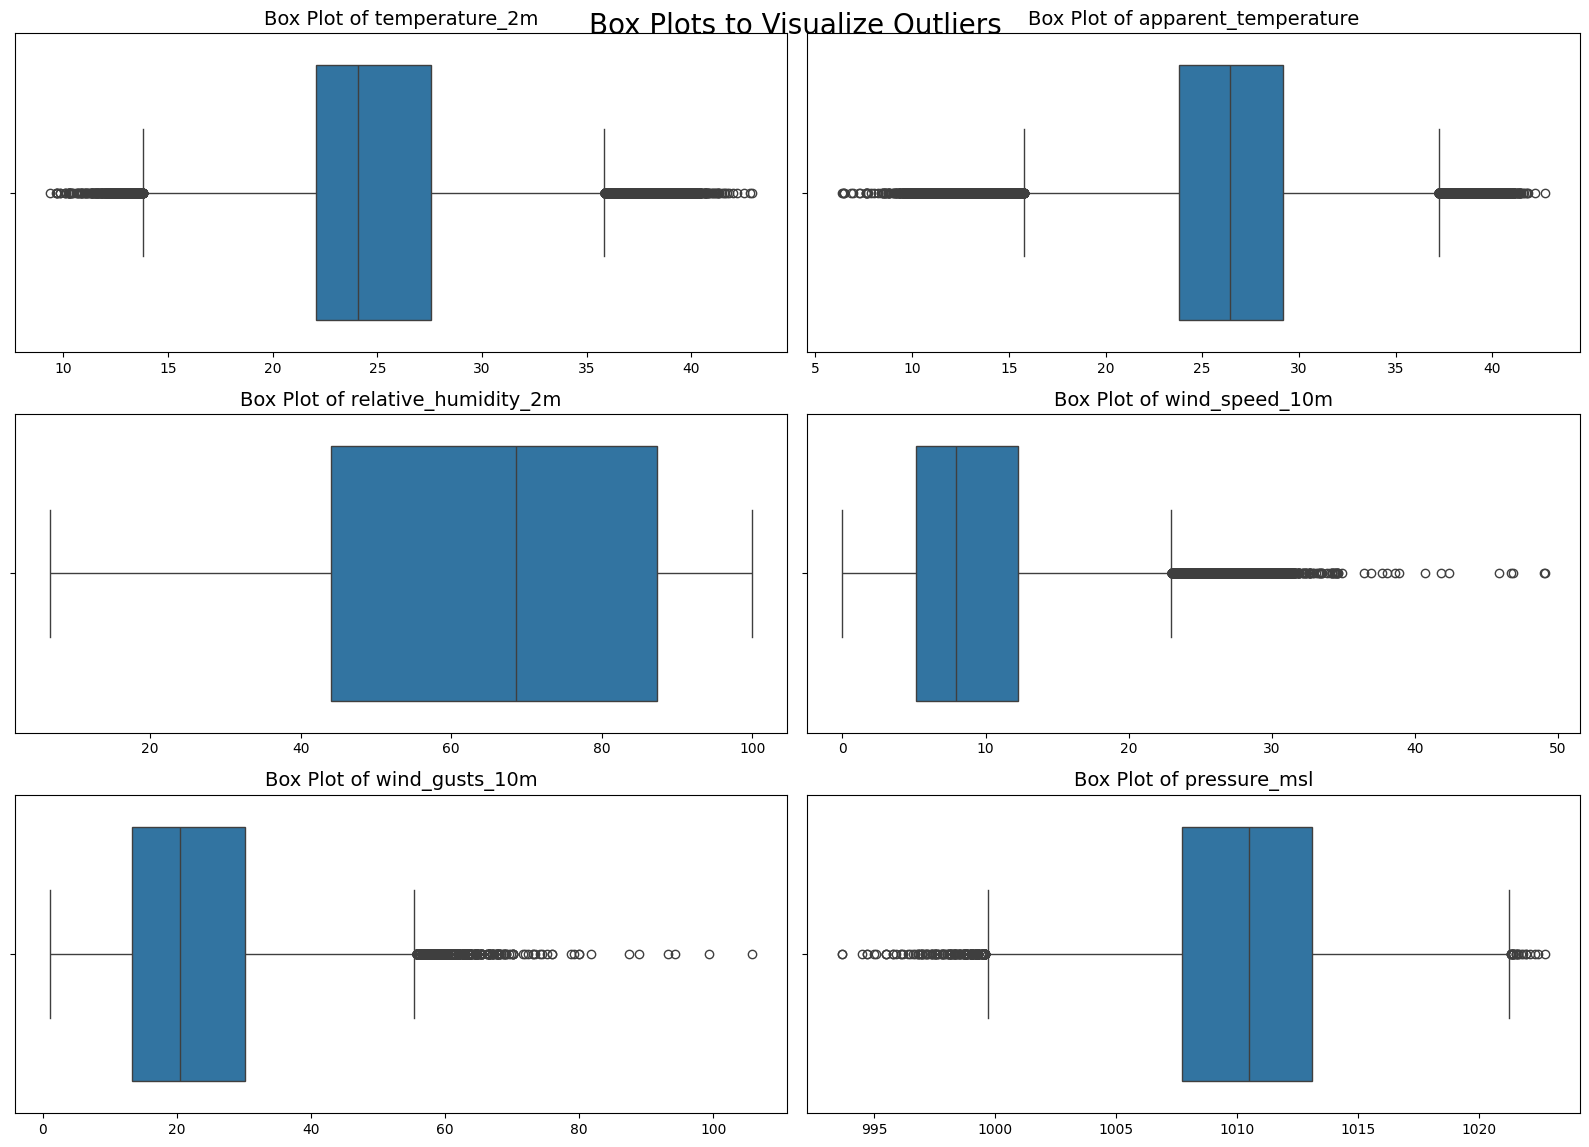

In [29]:
# Create box plots for selected columns to visualize outliers
plt.figure(figsize=(16, 12))
plt.suptitle('Box Plots to Visualize Outliers', fontsize=20, y=0.95)
# Select a few key columns for plotting
selected_cols = ['temperature_2m', 'apparent_temperature', 'relative_humidity_2m', 'wind_speed_10m', 'wind_gusts_10m', 'pressure_msl']

for i, col in enumerate(selected_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.xlabel('')

plt.tight_layout()
#plt.savefig('box_plots.png')
plt.show()




In [30]:
# # Create a time-series plot of temperature
# plt.figure(figsize=(18, 6))
# plt.plot(df_cleaned['date'], df_cleaned['temperature_2m'])
# plt.title('Time-Series of Temperature over the Years', fontsize=20)
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Temperature (2m)', fontsize=14)
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('temperature_time_series.png')
# plt.show()

In [31]:
print("--- Data after initial column dropping (your 'cleaned data'): ---")
print(df_cleaned.columns)
print(f"Shape of cleaned data: {df_cleaned.shape}")

--- Data after initial column dropping (your 'cleaned data'): ---
Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'rain', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m'],
      dtype='object')
Shape of cleaned data: (123936, 14)


In [32]:
# Create a copy of this cleaned DataFrame to store the processed values after outlier handling
df_processed_outliers = df_cleaned.copy()

In [33]:
#  Identify all numerical columns in this cleaned dataset
all_numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()


In [34]:
all_numerical_columns

['temperature_2m',
 'relative_humidity_2m',
 'dew_point_2m',
 'apparent_temperature',
 'rain',
 'pressure_msl',
 'surface_pressure',
 'cloud_cover',
 'wind_speed_10m',
 'wind_speed_100m',
 'wind_direction_10m',
 'wind_direction_100m',
 'wind_gusts_10m']

In [35]:
# from google.colab import drive
# drive.mount('/content/drive')

In [36]:
# Define the target column that needs special handling (log transformation)
target_column_for_transform = 'rain'

In [37]:
# Create a list of numerical columns that will undergo general capping (i.e., all numerical except 'rain')
numerical_columns_for_capping = [col for col in all_numerical_columns if col != target_column_for_transform]

In [38]:
# Lists to store names of columns that were actually treated
capped_feature_columns = []
log_transformed_column = None

In [39]:
print("\n--- Identifying and Handling Outliers in Numerical Columns: ---\n")

# Process numerical feature columns (capping)
for column in numerical_columns_for_capping:
    # Calculate Q1, Q3, and IQR for the current column from the ORIGINAL df_cleaned
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers in the current column (from original df_cleaned_initial)
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]

    # Report detection and apply capping if outliers exist
    if not outliers.empty:
        print(f"Outliers DETECTED in feature '{column}': {len(outliers)} instances.")
        df_processed_outliers[column] = np.clip(df_cleaned[column], lower_bound, upper_bound)
        capped_feature_columns.append(column)
        print(f"  -> Handled by CAPPING. Original range: [{df_cleaned[column].min():.2f}, {df_cleaned[column].max():.2f}], New range: [{df_processed_outliers[column].min():.2f}, {df_processed_outliers[column].max():.2f}]")
    else:
        print(f"No significant outliers DETECTED in feature '{column}', no capping applied.")



--- Identifying and Handling Outliers in Numerical Columns: ---

Outliers DETECTED in feature 'temperature_2m': 4273 instances.
  -> Handled by CAPPING. Original range: [9.36, 42.91], New range: [13.82, 35.82]
No significant outliers DETECTED in feature 'relative_humidity_2m', no capping applied.
Outliers DETECTED in feature 'dew_point_2m': 129 instances.
  -> Handled by CAPPING. Original range: [-6.24, 25.01], New range: [-2.60, 25.01]
Outliers DETECTED in feature 'apparent_temperature': 5827 instances.
  -> Handled by CAPPING. Original range: [6.40, 42.71], New range: [15.77, 37.22]
Outliers DETECTED in feature 'pressure_msl': 208 instances.
  -> Handled by CAPPING. Original range: [993.70, 1022.70], New range: [999.60, 1021.20]
Outliers DETECTED in feature 'surface_pressure': 444 instances.
  -> Handled by CAPPING. Original range: [931.90, 958.93], New range: [938.35, 957.32]
No significant outliers DETECTED in feature 'cloud_cover', no capping applied.
Outliers DETECTED in feature

In [40]:
# Process the 'rain' column (log transformation)
print(f"\nOutliers DETECTED in target '{target_column_for_transform}' (due to skewness/extreme values).")
print(f"  -> Handled by LOG TRANSFORMATION. Original '{target_column_for_transform}' min: {df_cleaned[target_column_for_transform].min():.2f}, max: {df_cleaned[target_column_for_transform].max():.2f}")
df_processed_outliers[f'{target_column_for_transform}_log_transformed'] = np.log1p(df_cleaned[target_column_for_transform])
log_transformed_column = f'{target_column_for_transform}_log_transformed'
print(f"  -> Transformed '{target_column_for_transform}_log_transformed' min: {df_processed_outliers[f'{target_column_for_transform}_log_transformed'].min():.2f}, max: {df_processed_outliers[f'{target_column_for_transform}_log_transformed'].max():.2f}")

print(f"\nSummary of Outlier Handling:")
print(f"Feature columns where outliers were capped: {capped_feature_columns}")
print(f"The '{target_column_for_transform}' column was log-transformed: {log_transformed_column}")


Outliers DETECTED in target 'rain' (due to skewness/extreme values).
  -> Handled by LOG TRANSFORMATION. Original 'rain' min: 0.00, max: 24.50
  -> Transformed 'rain_log_transformed' min: 0.00, max: 3.24

Summary of Outlier Handling:
Feature columns where outliers were capped: ['temperature_2m', 'dew_point_2m', 'apparent_temperature', 'pressure_msl', 'surface_pressure', 'wind_speed_10m', 'wind_speed_100m', 'wind_gusts_10m']
The 'rain' column was log-transformed: rain_log_transformed


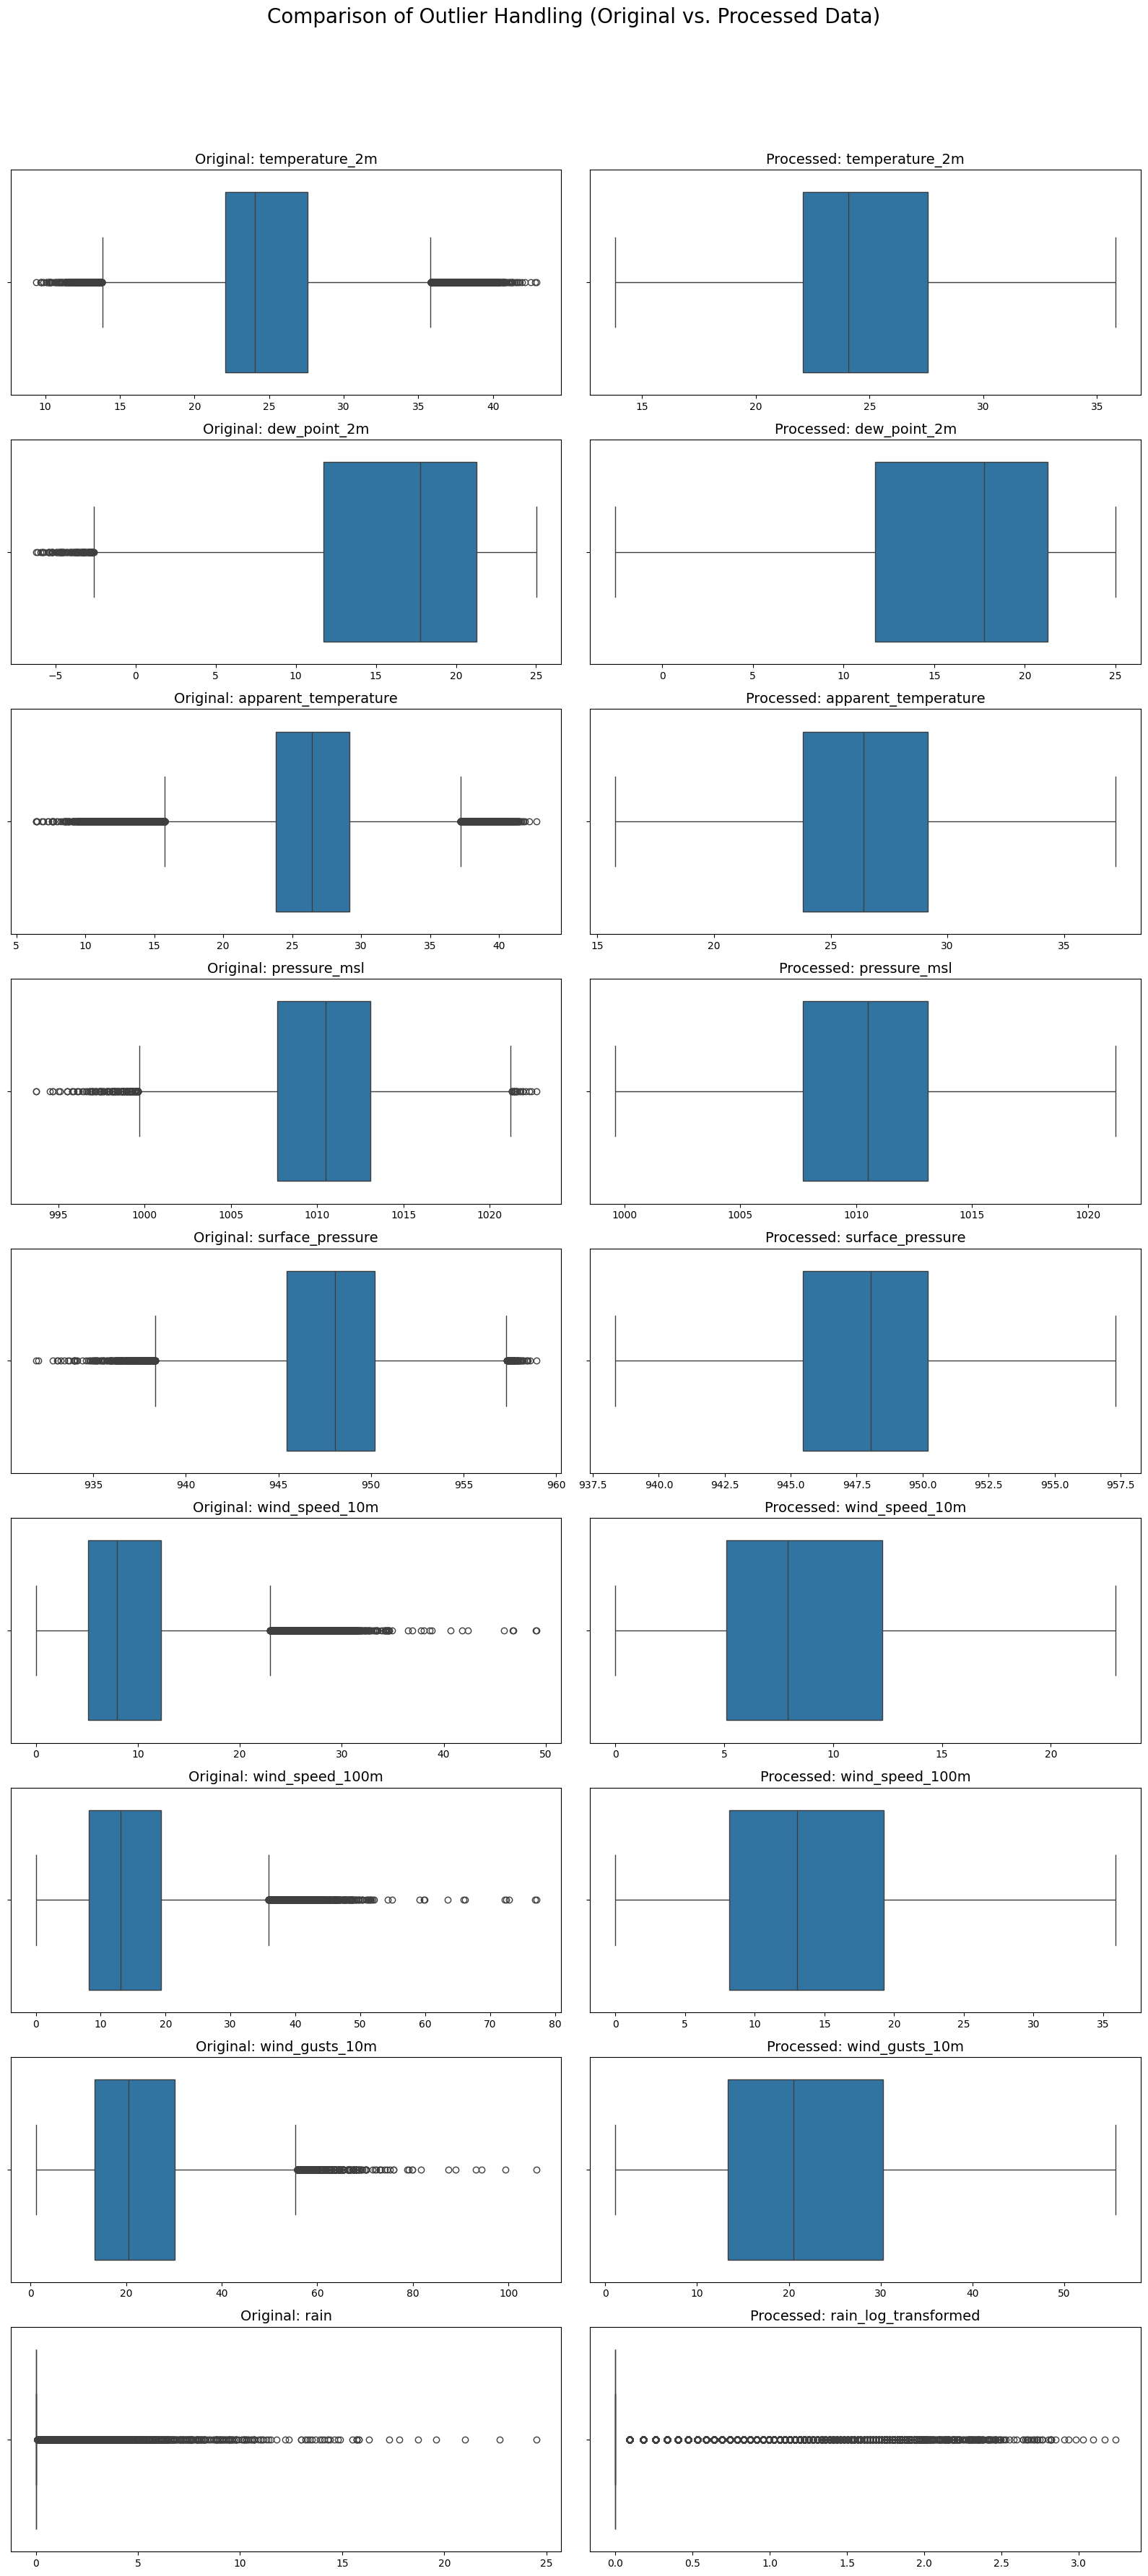

In [41]:
# --- Step 3: Plotting to Visualize the Effects of Outlier Handling ---

# Prepare list of columns for plotting: all columns that were either capped or log-transformed
columns_for_visual_comparison = capped_feature_columns + ([log_transformed_column] if log_transformed_column else [])

if columns_for_visual_comparison:
    num_plots = len(columns_for_visual_comparison)
    # Arrange plots in a 2-column layout for better readability
    # Need 2 subplots per column (original and processed)
    n_rows = (num_plots * 2 + 1) // 2 # Calculate rows needed for original and processed side-by-side
    fig, axes = plt.subplots(n_rows, 2, figsize=(16, 4 * n_rows))
    fig.suptitle('Comparison of Outlier Handling (Original vs. Processed Data)', fontsize=20, y=1.02)

    # Flatten axes array for easy iteration, handling cases with 1 row or 1 column
    axes = axes.flatten() if n_rows > 1 or num_plots * 2 > 1 else [axes]

    for i, processed_col_name in enumerate(columns_for_visual_comparison):
        # Determine the original column name for plotting comparison
        if processed_col_name == log_transformed_column:
            original_col_to_plot = target_column_for_transform
        else:
            original_col_to_plot = processed_col_name

        # Plot Original Data
        sns.boxplot(x=df_cleaned[original_col_to_plot], ax=axes[i*2])
        axes[i*2].set_title(f'Original: {original_col_to_plot}', fontsize=14)
        axes[i*2].set_xlabel('')

        # Plot Processed Data
        sns.boxplot(x=df_processed_outliers[processed_col_name], ax=axes[i*2 + 1])
        axes[i*2 + 1].set_title(f'Processed: {processed_col_name}', fontsize=14)
        axes[i*2 + 1].set_xlabel('')

    # Hide any unused subplots if the number of plots is odd (only applies to the last row if num_plots is odd)
    # We are plotting 2 plots per column, so we will always use an even number of subplots if num_plots > 0
    # If num_plots is 0, no plots are created.
    if num_plots > 0 and (num_plots * 2) % 2 != 0:
        # This case should not happen with current logic (num_plots * 2 is always even if num_plots is int)
        # but leaving this structure in case plotting logic changes.
         for j in range(num_plots * 2, len(axes)):
            fig.delaxes(axes[j])
    # Corrected logic to hide extra subplots in the last row if num_plots * 2 is less than total subplots created
    if num_plots > 0:
        for j in range(num_plots * 2, n_rows * 2):
            fig.delaxes(axes[j])


    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
    plt.savefig('outlier_handling_cleaned_data_final.png')
    plt.show()

In [42]:
# --- Step 4: Display Summary Statistics for comparison ---
print("\nSummary statistics for original vs. processed data (for treated columns):")
for col_name in columns_for_visual_comparison:
    original_col_name = col_name.replace('_log_transformed', '') # Get original name for stats
    print(f"\n--- Column: {original_col_name} (Processed as {col_name}) ---")
    original_stats = df_cleaned[original_col_name].describe()
    processed_stats = df_processed_outliers[col_name].describe()
    comparison_df = pd.DataFrame({'Original': original_stats, 'Processed': processed_stats})
    print(comparison_df)

# The 'df_processed_outliers' DataFrame now contains the cleaned data with outliers handled.
# This DataFrame is ready for further analysis, feature engineering, or model training.


Summary statistics for original vs. processed data (for treated columns):

--- Column: temperature_2m (Processed as temperature_2m) ---
            Original      Processed
count  123936.000000  123936.000000
mean       24.887953      24.844913
std         4.810214       4.675454
min         9.364000      13.820000
25%        22.070000      22.070000
50%        24.064001      24.064001
75%        27.570000      27.570000
max        42.913998      35.820000

--- Column: dew_point_2m (Processed as dew_point_2m) ---
            Original      Processed
count  123936.000000  123936.000000
mean       16.172284      16.173565
std         5.707758       5.703323
min        -6.236000      -2.596002
25%        11.719999      11.719999
50%        17.770000      17.770000
75%        21.264000      21.264000
max        25.014000      25.014000

--- Column: apparent_temperature (Processed as apparent_temperature) ---
            Original      Processed
count  123936.000000  123936.000000
mean       

In [43]:
df_processed_outliers

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,rain,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,rain_log_transformed
0,2010-01-01 00:00:00+00:00,15.820000,73.394290,11.070000,15.766374,0.0,1012.2,947.63930,1.5,8.121970,15.745627,102.80426,100.539130,20.519999,0.0
1,2010-01-01 01:00:00+00:00,15.520000,75.815544,11.270000,15.766374,0.0,1013.0,948.32380,5.4,8.905908,16.946787,104.03627,102.264760,21.240000,0.0
2,2010-01-01 02:00:00+00:00,15.270000,79.629880,11.770000,15.766374,0.0,1013.7,948.92530,6.0,9.605998,18.079027,102.99462,102.652550,21.599998,0.0
3,2010-01-01 03:00:00+00:00,18.220001,67.795140,12.170000,17.350403,0.0,1014.8,950.58610,2.4,10.594036,18.003600,99.78234,101.534590,24.480000,0.0
4,2010-01-01 04:00:00+00:00,20.920000,57.516280,12.219999,20.013638,0.0,1015.2,951.52830,14.1,10.948973,15.391840,99.46225,100.784256,27.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,2024-02-20 19:00:00+00:00,20.764000,50.335873,10.064000,19.377905,0.0,1014.6,950.93340,0.0,9.726665,20.082708,267.87894,284.534500,17.280000,0.0
123932,2024-02-20 20:00:00+00:00,19.914000,54.666065,10.514000,18.663721,0.0,1013.9,950.09980,0.0,9.693295,19.164719,254.93146,275.389220,16.919998,0.0
123933,2024-02-20 21:00:00+00:00,19.314001,58.271225,10.914001,18.195717,0.0,1013.3,949.41174,0.0,9.605998,18.775301,257.00537,274.398620,16.919998,0.0
123934,2024-02-20 22:00:00+00:00,18.764000,60.706370,11.014000,17.635400,0.0,1012.9,948.92140,0.0,9.885262,19.917469,259.50858,276.225740,16.919998,0.0


In [44]:
df_processed_outliers.rain.unique()

array([ 0. ,  0.1,  0.6,  0.9,  1. ,  1.2,  0.3,  0.7,  0.2,  0.5,  0.4,
        1.1,  1.3,  1.5,  1.6,  0.8,  3.9,  1.4,  1.9,  3.5,  4.8,  1.8,
        2.3,  2.5,  1.7,  2.7,  4.6,  8.2,  6.2,  3.8,  2.6,  4.1,  2.2,
        2.4,  3.1,  3. ,  3.7,  2.1,  5.2,  5.6,  5.5,  4.4,  4. ,  3.6,
        5.3,  9.2,  9. ,  7.9,  5.1,  2. ,  2.8,  2.9,  5.8,  5.4,  7.6,
        5.7,  7.4,  9.4, 13.5, 13.4,  4.5,  6.3,  6.4,  5.9,  4.7,  4.9,
        4.2,  4.3,  3.3,  3.2,  3.4,  7.5,  7.1,  6.7,  5. ,  6. ,  6.5,
        6.9,  8.1,  9.1, 15.7, 14. ,  6.8,  8. ,  7. ,  9.8,  8.9,  6.1,
        9.7, 15.8,  7.3,  7.2,  6.6, 10.2, 11.8, 14.8, 13.7, 10.7,  8.8,
        9.5, 10.3,  9.3,  8.3, 10.9, 11.3, 10.5, 18.7, 22.7, 24.5, 10.1,
       11. , 12.4, 11.1,  7.7,  8.5,  9.6, 14.3, 14.1, 11.4, 14.9, 17.8,
       12.2,  8.7,  7.8, 11.5, 13. ,  9.9, 13.2, 13.3, 13.9, 10.6, 21. ,
       10.4, 17.3, 14.6, 15.5, 14.4,  8.4, 16.3, 19.6,  8.6])

In [45]:
df_processed_outliers.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'rain', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'wind_speed_10m', 'wind_speed_100m',
       'wind_direction_10m', 'wind_direction_100m', 'wind_gusts_10m',
       'rain_log_transformed'],
      dtype='object')

In [46]:
df_processed_outliers.rain_log_transformed.unique()

array([0.        , 0.09531018, 0.47000363, 0.64185389, 0.69314718,
       0.78845736, 0.26236426, 0.53062825, 0.18232156, 0.40546511,
       0.33647224, 0.74193734, 0.83290912, 0.91629073, 0.95551145,
       0.58778666, 1.58923521, 0.87546874, 1.06471074, 1.5040774 ,
       1.75785792, 1.02961942, 1.19392247, 1.25276297, 0.99325177,
       1.30833282, 1.7227666 , 2.21920348, 1.97408103, 1.56861592,
       1.28093385, 1.62924054, 1.16315081, 1.22377543, 1.41098697,
       1.38629436, 1.54756251, 1.13140211, 1.82454929, 1.88706965,
       1.87180218, 1.68639895, 1.60943791, 1.5260563 , 1.84054963,
       2.32238772, 2.30258509, 2.18605128, 1.80828877, 1.09861229,
       1.33500107, 1.36097655, 1.91692261, 1.85629799, 2.1517622 ,
       1.90210753, 2.12823171, 2.34180581, 2.67414865, 2.66722821,
       1.70474809, 1.98787435, 2.00148   , 1.93152141, 1.74046617,
       1.77495235, 1.64865863, 1.66770682, 1.45861502, 1.43508453,
       1.48160454, 2.14006616, 2.09186406, 2.04122033, 1.79175

In [47]:
df_processed_outliers.to_csv('df_processed_outliers.csv')

In [48]:
# Inverse transform the 'rain_log_transformed' column
df_processed_outliers['rain_original_scale'] = np.expm1(df_processed_outliers['rain_log_transformed'])

# Display the first few rows to show the new column
display(df_processed_outliers[['rain', 'rain_log_transformed', 'rain_original_scale']].head())

# You can also verify the unique values in the new column to see the original rain values
print("\nUnique values in the inverse transformed 'rain' column:")
print(df_processed_outliers['rain_original_scale'].unique())

,rain,rain_log_transformed,rain_original_scale
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0



Unique values in the inverse transformed 'rain' column:
[ 0.   0.1  0.6  0.9  1.   1.2  0.3  0.7  0.2  0.5  0.4  1.1  1.3  1.5
  1.6  0.8  3.9  1.4  1.9  3.5  4.8  1.8  2.3  2.5  1.7  2.7  4.6  8.2
  6.2  3.8  2.6  4.1  2.2  2.4  3.1  3.   3.7  2.1  5.2  5.6  5.5  4.4
  4.   3.6  5.3  9.2  9.   7.9  5.1  2.   2.8  2.9  5.8  5.4  7.6  5.7
  7.4  9.4 13.5 13.4  4.5  6.3  6.4  5.9  4.7  4.9  4.2  4.3  3.3  3.2
  3.4  7.5  7.1  6.7  5.   6.   6.5  6.9  8.1  9.1 15.7 14.   6.8  8.
  7.   9.8  8.9  6.1  9.7 15.8  7.3  7.2  6.6 10.2 11.8 14.8 13.7 10.7
  8.8  9.5 10.3  9.3  8.3 10.9 11.3 10.5 18.7 22.7 24.5 10.1 11.  12.4
 11.1  7.7  8.5  9.6 14.3 14.1 11.4 14.9 17.8 12.2  8.7  7.8 11.5 13.
  9.9 13.2 13.3 13.9 10.6 21.  10.4 17.3 14.6 15.5 14.4  8.4 16.3 19.6
  8.6]


In [49]:
df_processed_outliers

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,rain,pressure_msl,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,rain_log_transformed,rain_original_scale
0,2010-01-01 00:00:00+00:00,15.820000,73.394290,11.070000,15.766374,0.0,1012.2,947.63930,1.5,8.121970,15.745627,102.80426,100.539130,20.519999,0.0,0.0
1,2010-01-01 01:00:00+00:00,15.520000,75.815544,11.270000,15.766374,0.0,1013.0,948.32380,5.4,8.905908,16.946787,104.03627,102.264760,21.240000,0.0,0.0
2,2010-01-01 02:00:00+00:00,15.270000,79.629880,11.770000,15.766374,0.0,1013.7,948.92530,6.0,9.605998,18.079027,102.99462,102.652550,21.599998,0.0,0.0
3,2010-01-01 03:00:00+00:00,18.220001,67.795140,12.170000,17.350403,0.0,1014.8,950.58610,2.4,10.594036,18.003600,99.78234,101.534590,24.480000,0.0,0.0
4,2010-01-01 04:00:00+00:00,20.920000,57.516280,12.219999,20.013638,0.0,1015.2,951.52830,14.1,10.948973,15.391840,99.46225,100.784256,27.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123931,2024-02-20 19:00:00+00:00,20.764000,50.335873,10.064000,19.377905,0.0,1014.6,950.93340,0.0,9.726665,20.082708,267.87894,284.534500,17.280000,0.0,0.0
123932,2024-02-20 20:00:00+00:00,19.914000,54.666065,10.514000,18.663721,0.0,1013.9,950.09980,0.0,9.693295,19.164719,254.93146,275.389220,16.919998,0.0,0.0
123933,2024-02-20 21:00:00+00:00,19.314001,58.271225,10.914001,18.195717,0.0,1013.3,949.41174,0.0,9.605998,18.775301,257.00537,274.398620,16.919998,0.0,0.0
123934,2024-02-20 22:00:00+00:00,18.764000,60.706370,11.014000,17.635400,0.0,1012.9,948.92140,0.0,9.885262,19.917469,259.50858,276.225740,16.919998,0.0,0.0
